In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

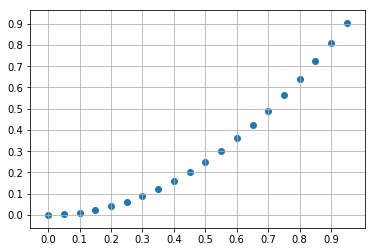

<class 'matplotlib.axes._subplots.AxesSubplot'>


In [3]:
x = np.arange(0, 1, 0.05)
y = np.power(x, 2)

fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 1, 0.1))
ax.set_yticks(np.arange(0, 1., 0.1))
plt.scatter(x, y)
plt.grid()
plt.show()
print(type(ax))

In [3]:
df = pd.read_csv('./titan/train.csv')

In [4]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
df.info()
print('__'*30)
print(df[df['Pclass']==3].isnull().sum())
len(df[df['Pclass']==3])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
____________________________________________________________
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            136
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          479
Embarked         0
dtype: int64


491

In [59]:
# Function that takes 2 colors and variable which nneds to be plotted with survival count as argument and gives us our reqd. graph
def graph_fn(var , color_dead , color_lived):
    x = df[pd.notnull(df[var])]
    a=x[var].unique()
    a=np.sort(a)
    fig, ax=plt.subplots()
    x = np.array(range(len(a)))+1
    b = []
    c = []
    for values in a:
        b.append(df[df[var]==values]['Survived'].sum())
        c.append(len(df.iloc[np.where(df[var]==values)].Survived)-df[df[var]==values]['Survived'].sum())
    index = np.arange(len(a))
    plt.bar(index, c , color = color_dead ,edgecolor='Black',bottom=b,label='Not-Survived')
    plt.bar(index, b , color = color_lived,edgecolor='Black',label='Survived')
    z = np.array(b)+np.array(c)
    p
    ax.bar(index, z)
    ax.set_xlabel(var, fontsize=10)
    ax.set_ylabel('Survival Count', fontsize=10)
    plt.xticks(index, a, fontsize=10,)
    plt.title('Survival Count vs '+ var,fontsize=25)
    plt.legend(loc='upper left')
    plt.rcParams["figure.figsize"] = (10,10)
    plt.show()

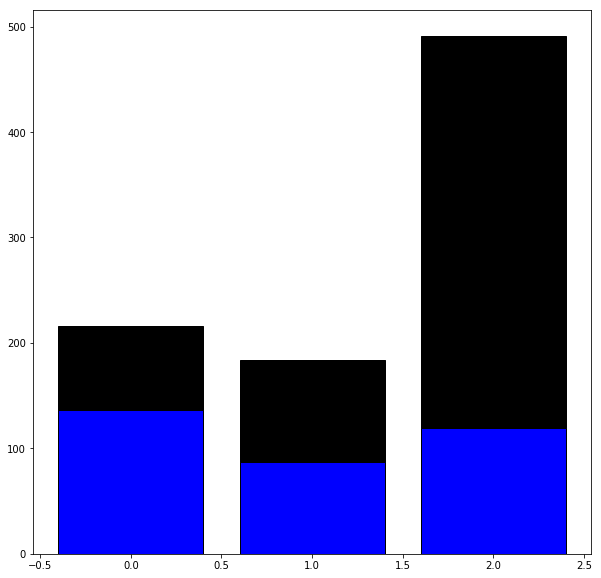

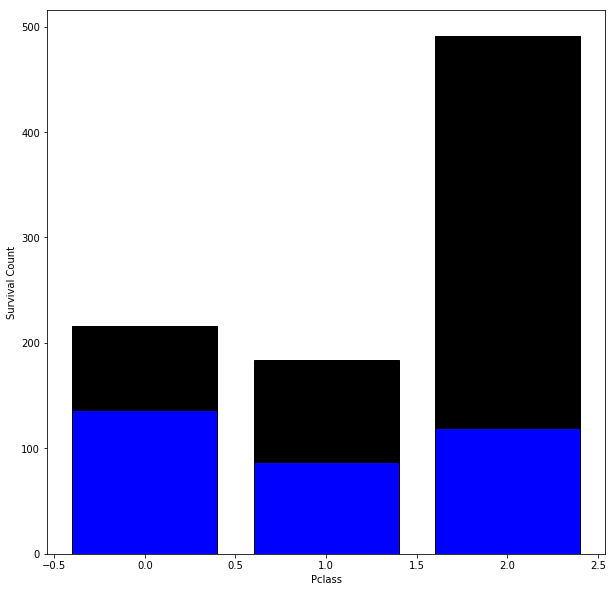

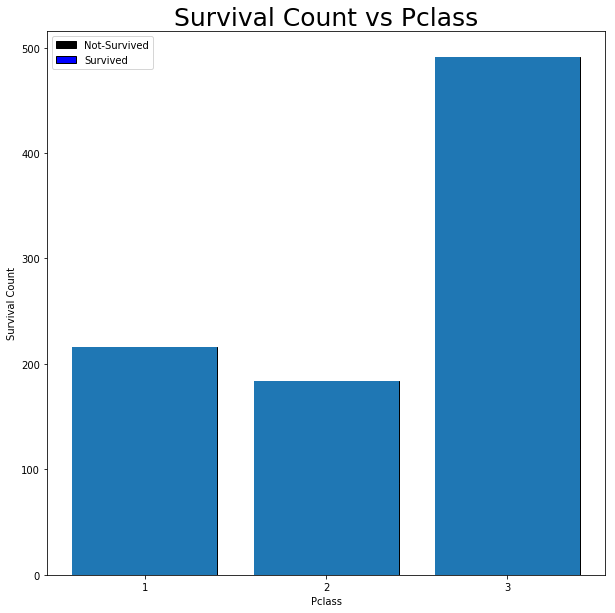

In [60]:
#1. make a vertical bar plot which shows the count of survivals=1/0 for each ticket class
#f , ax = plt.subplots()
graph_fn('Pclass','black','blue')


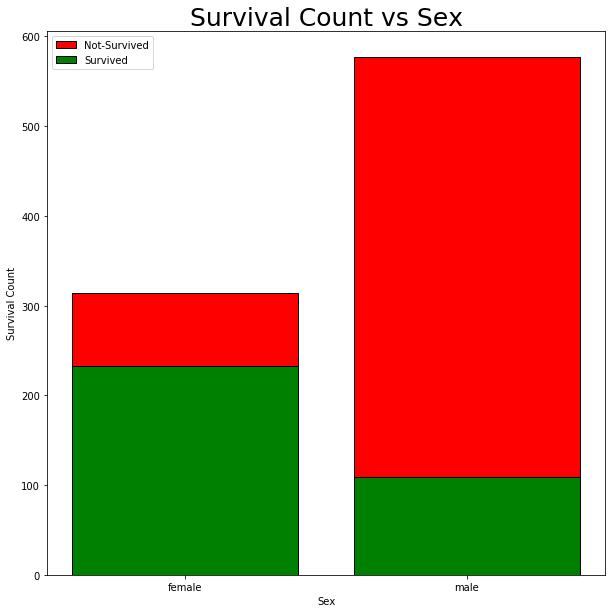

In [25]:
#2. make a vertical bar plot which shows the count of survivals=1/0 for each sex type
graph_fn('Sex','red','green')

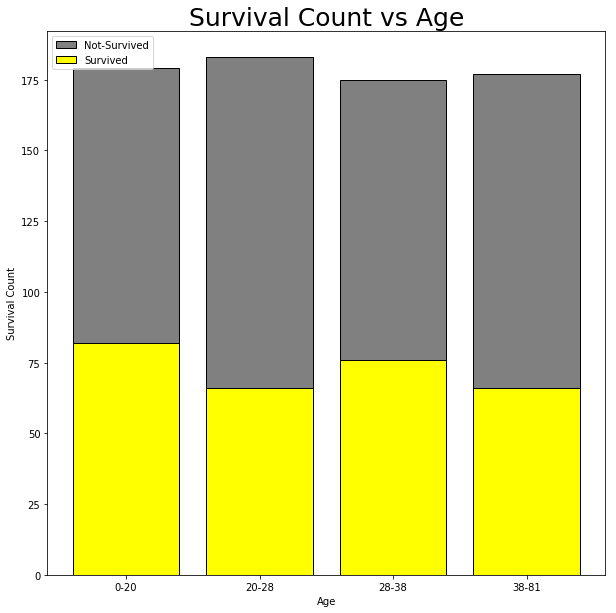

In [26]:
#3. make a vertical bar plot which shows the count of survivals=1/0 with age
x = df[pd.notnull(df['Age'])]
bins=[0,20,28,38,80]
a =pd.cut(x["Age"],bins)
alpha=x.groupby(a).count()-x.groupby(a).sum()
beta=x.groupby(a).sum()
const = alpha['Age']
m = alpha['Survived']
n = beta['Survived']
index = np.arange(len(const))
plt.bar(index, m , color = 'grey',edgecolor='black',bottom=n,label='Not-Survived')
plt.bar(index, n , color = 'yellow',edgecolor='black',label='Survived')
plt.xlabel('Age', fontsize=10)
plt.ylabel('Survival Count', fontsize=10)
plt.xticks(index,['0-20','20-28','28-38','38-81'], fontsize=10,)
plt.title('Survival Count vs '+ 'Age',fontsize=25)
plt.legend(loc='upper left')
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

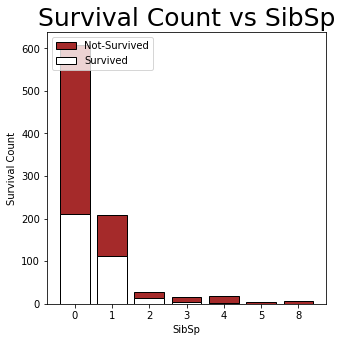

In [27]:
#4. make a vertical bar plot which shows the count of survivals=1/0 with sibsp
graph_fn('SibSp','brown','white')

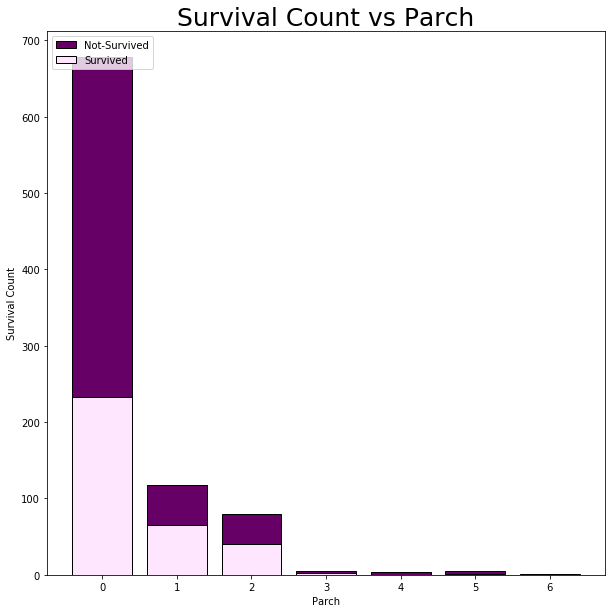

In [28]:
#5. make a vertical bar plot which shows the count of survivals=1/0 with parch
graph_fn('Parch', '#660066','#ffe6ff')

In [29]:
#6. make a vertical bar plot which shows the count of survivals=1/0 with ticket
import re
df['tick']=None
for i in range(len(df)):
    strin=df['Ticket'][i]
    a=strin.split(' ')
    try:
        temp=int(a[0])
        length =len(a[0])
        df['tick'][i]=new.lower()
    except:
        new=re.sub('[^a-zA-Z0-9 \n]', '', a[0])
        df['tick'][i]=new.lower()
df['ticket']=None
new=None
for k in range(len(df)):
    ele=df['tick'][k]
    try:
        new=ele[0]+''
        df['ticket'][k]=new
    except:
        df['ticket'][k]=new       

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


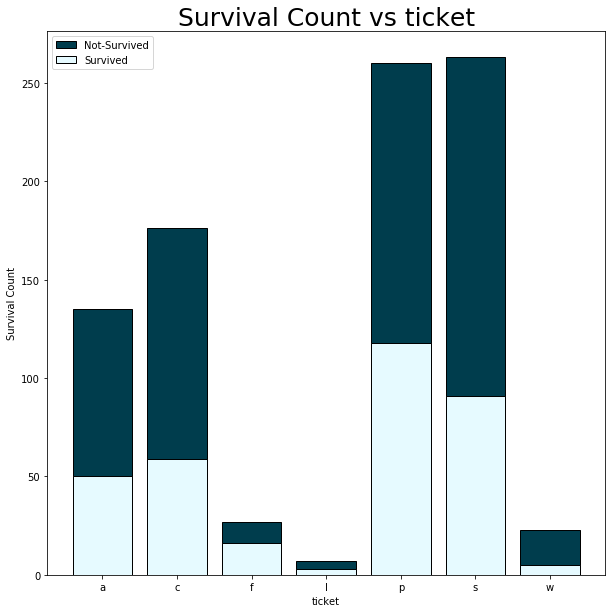

In [30]:
graph_fn('ticket','#003d4d','#e6faff')

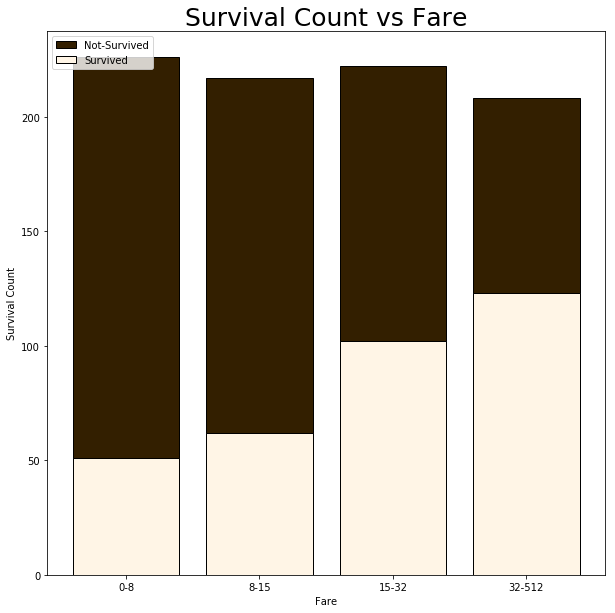

In [31]:
#7. make a vertical bar plot which shows the count of survivals=1/0 with fare
x = df[pd.notnull(df['Fare'])]
bins=[0,8,15,32,512]
a =pd.cut(x["Fare"],bins)
alpha=x.groupby(a).count()-x.groupby(a).sum()
beta=x.groupby(a).sum()
const = alpha['Fare']
m = alpha['Survived']
n = beta['Survived']
index = np.arange(len(const))
plt.bar(index, m , color = '#331f00',edgecolor='black',bottom=n,label='Not-Survived')
plt.bar(index, n , color = '#fff5e6',edgecolor='black',label='Survived')
plt.xlabel('Fare', fontsize=10)
plt.ylabel('Survival Count', fontsize=10)
plt.xticks(index,['0-8','8-15','15-32','32-512'], fontsize=10,)
plt.title('Survival Count vs '+ 'Fare',fontsize=25)
plt.legend(loc='upper left')
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

In [32]:
#8. make a vertical bar plot which shows the count of survivals=1/0 with cabin
df['Cabin-No.']=None
new='aaa'
for k in range(len(df)):
    ele=df['Cabin'][k]
    try:
        new=ele[0]+''
        df['Cabin-No.'][k]=new
    except:
        df['Cabin-No.'][k]=new
        

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


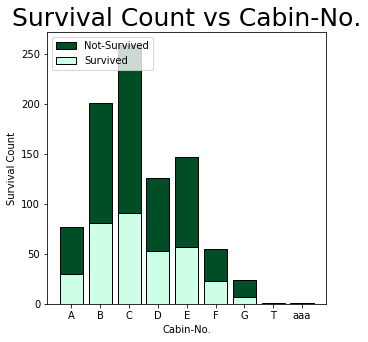

In [33]:
graph_fn('Cabin-No.','#004d26','#ccffe6')

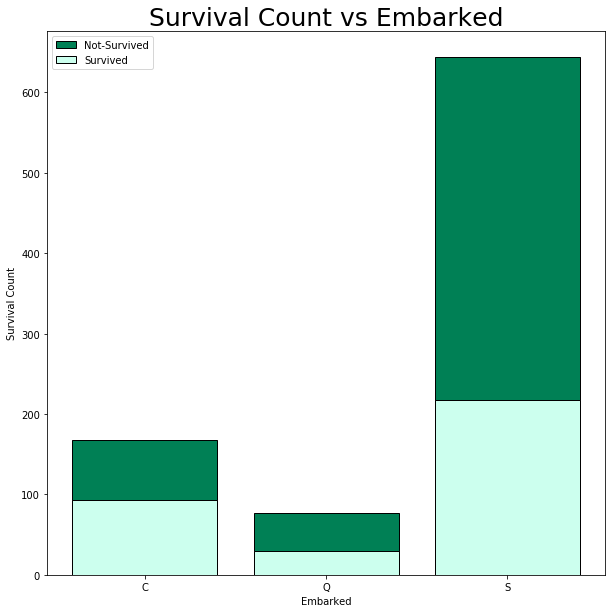

In [34]:
#9. make a vertical bar plot which shows the count of survivals=1/0 with embarked
graph_fn('Embarked','#008055','#ccffee')